In [1]:
# All imports (TODO: Add appropriate packages if necessary)
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from utils import *

%reload_ext autoreload
%autoreload 2

# Load data
x0 = np.loadtxt('../../data/nonlinear_vectorfield_data_x0.txt')
x1 = np.loadtxt('../../data/nonlinear_vectorfield_data_x1.txt')

### TODO: Part 1 - Estimate the vector field with a linear operator and compute mean squared error to the solution after $\Delta t$

In [2]:
delta_T = 0.01

v = (x1-x0)/delta_T

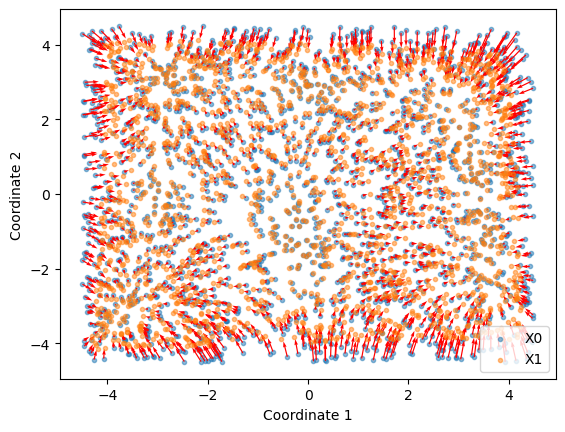

In [3]:
plt.scatter(x0[:,0],x0[:,1], label = 'X0', alpha= 0.5, marker= '.')
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5, marker= '.')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.legend()

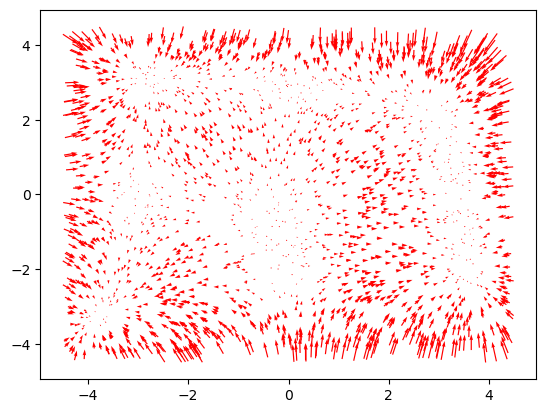

In [4]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')

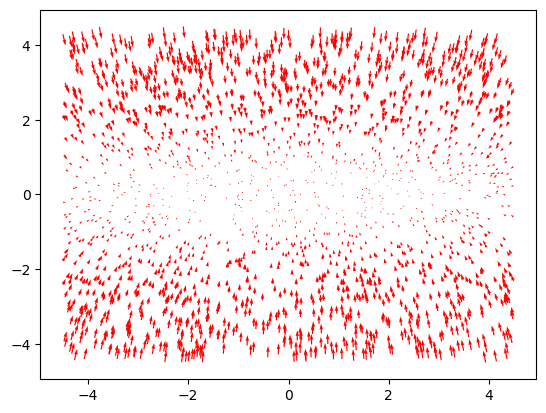

In [5]:
A_estim = least_squares(x0,v)[0:2,0:2]
approx = x0@A_estim
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'r')

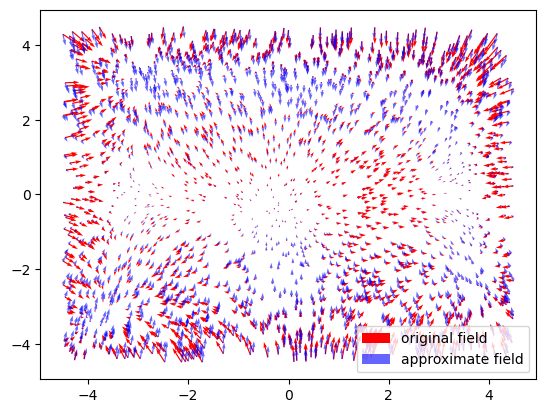

In [6]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.legend()

In [7]:
A_estim

array([[-1.0016012 ,  0.08672716],
       [-0.02534942, -4.32671381]])

In [8]:
def f(t, y):
    return np.dot(y, A_estim)

In [9]:
approx_x1 = x1_estim(f,x0, delta_T)
mean_squared_error(x1, approx_x1)

0.03727581844374585

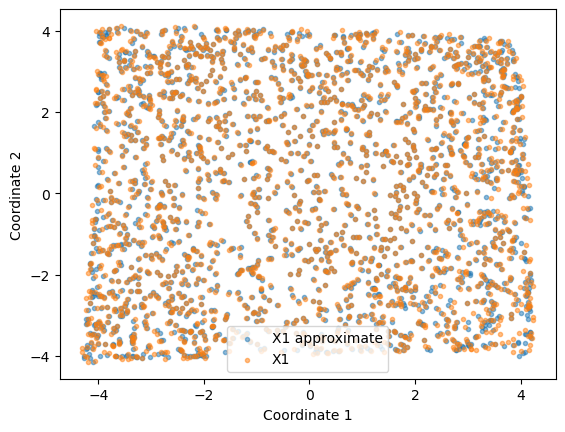

In [35]:
plt.scatter(approx_x1[:,0],approx_x1[:,1], label = 'X1 approximate', alpha= 0.5, marker='.')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5, marker= '.')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.legend()

### TODO: Part 2 - Approximate the vector field with RBF and compute mean squared error to the solution after $\Delta t$

In [382]:
L = 500
x = np.linspace(-4.5, 4.5, L)
centers = 9*np.random.random_sample((L,2)) -4.5

In [383]:
phi = approx_non_linear_field(x0,centers, 0.08)
C =  least_squares(phi.T, v)
approx_field = np.dot(phi.T, C)
def g(t, y):
    y = y.reshape(2000,2)
    phi_ = approx_non_linear_field(y,centers, 0.07999)
    C =  least_squares(phi_.T, v)
    return np.dot(phi_.T,C).flatten()

In [384]:
C.shape

(500, 2)

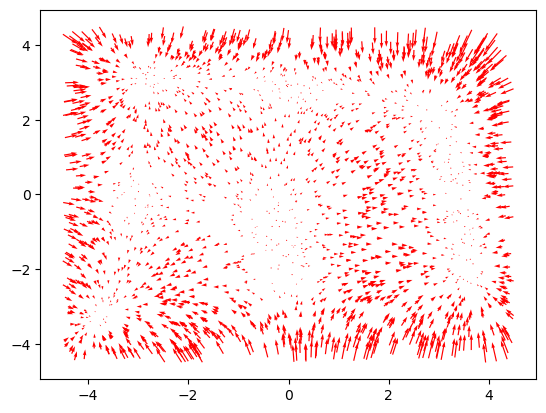

In [204]:
plt.quiver(x0[:,0], x0[:,1], approx_field[:,0], approx_field[:,1], color= 'r')

In [205]:
x1

array([[-0.79317039,  2.09824395],
       [-4.20066645, -1.95521799],
       [-3.32344627, -3.54971712],
       ...,
       [ 3.93738073,  1.83673157],
       [-1.79153043, -3.59123607],
       [ 0.78836138,  2.17869936]])

In [206]:
SOL = solve_ivp(g, [0,delta_T], x0.flatten(), t_eval= [delta_T])

In [237]:
x1_estim_non_linear = SOL.y.reshape(2000,2)

In [238]:
mean_squared_error(x1_estim_non_linear, x1)

1.4018802891326485e-05

MSE of 1.41e-05 (L=500, eps=0.08) for non linear model VS MSE of 0.03 for Linear model. Vector field is most likely non linear!

In [178]:
def g_cheat(t, y):
    y = y.reshape(2000,2)
    return  built_int_interpolator(y,v,0.9).flatten()

In [180]:
SOL_cheat = solve_ivp(g_cheat, [0,delta_T], x0.flatten(), t_eval= [delta_T])

In [183]:
x1_approx_cheat = SOL_cheat.y.reshape(2000,2)

In [184]:
mean_squared_error(x1, x1_approx_cheat)

1.3804537707833068e-05

### TODO: Part 3 - Analysis of the system

In [214]:
T_end = 1
t_eval = np.arange(0,1,delta_T)
solve = solve_ivp(g, [0,T_end], x0.flatten(), t_eval= t_eval)

In [302]:
T_end = 10
solve_2 = solve_ivp(g, [0,T_end], x0.flatten())

In [320]:
t_eval_2 = solve_2.t

In [241]:
list_sol = []
for i in range(len(t_eval)):
 list_sol.append(solve.y[:,i].reshape(2000,2))

In [286]:
trajectories = []
for j in range(len(x0)):
    trajectory = []
    for i in range(len(t_eval)):
        trajectory.append(list_sol[i][j])
    trajectories.append(trajectory)

Text(0.5, 1.0, 'Predicted end of trajectory')

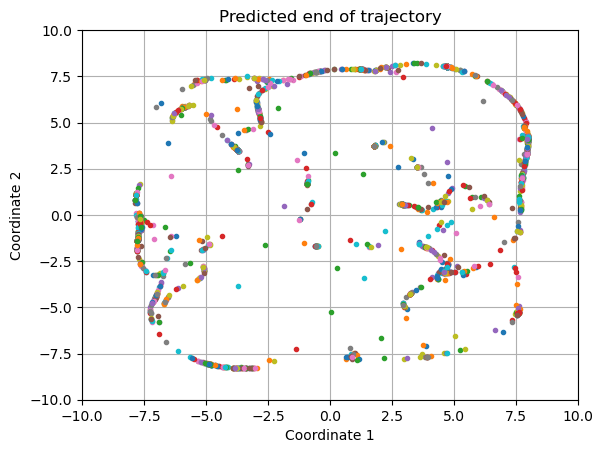

In [333]:
for k in range(len(trajectories)) :
    trajectory_k = np.array(trajectories[k])
    plt.plot(trajectory_k[99,0],trajectory_k[99,1], '.')
    #print(trajectory_k[99,0])
    #print(trajectory_k[99,1])
    #plt.plot(-0.74680196,  1.98292044, 'o', color = 'r')
    plt.xlabel("Coordinate 1")
    plt.ylabel("Coordinate 2")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
#plt.quiver(x0[:,0], x0[:,1], approx_field[:,0], approx_field[:,1], color= 'r')
#plt.scatter(x0[:,0],x0[:,1], label = 'X0', alpha= 0.5, marker= '.')
plt.grid()
plt.title("Predicted end of trajectory")

In [323]:
list_sol_2 = []
for i in range(len(t_eval_2)):
 list_sol_2.append(solve_2.y[:,i].reshape(2000,2))
trajectories_2 = []
for j in range(len(x0)):
    trajectory = []
    for i in range(len(t_eval_2)):
        trajectory.append(list_sol_2[i][j])
    trajectories_2.append(trajectory)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
0
50
100
150
200
250
300


Text(0.5, 1.0, 'Predicted end of trajectory')

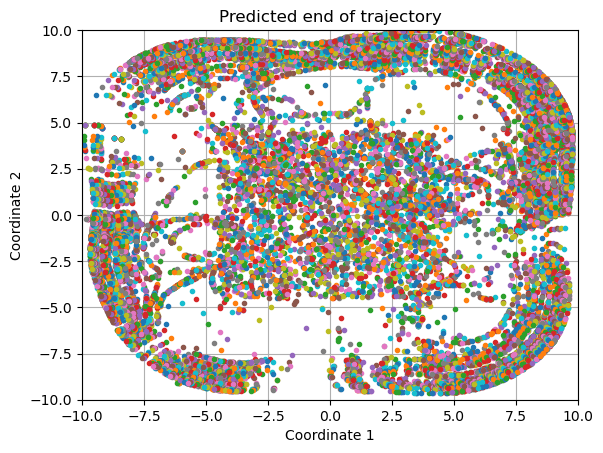

In [324]:
for k in range(len(trajectories_2)) :
    trajectory_k = np.array(trajectories_2[k])
    for i in range(0,len(t_eval_2),50):
        print(i)
        plt.plot(trajectory_k[i,0],trajectory_k[i,1], marker='.')
        #print(trajectory_k[99,0])
        #print(trajectory_k[99,1])
        #plt.plot(-0.74680196,  1.98292044, 'o', color = 'r')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
#plt.quiver(x0[:,0], x0[:,1], approx_field[:,0], approx_field[:,1], color= 'r')
#plt.scatter(x0[:,0],x0[:,1], label = 'X0', alpha= 0.5, marker= '.')
plt.grid()
plt.title("Predicted end of trajectory")

Text(0.5, 1.0, 'Predicted end of trajectory')

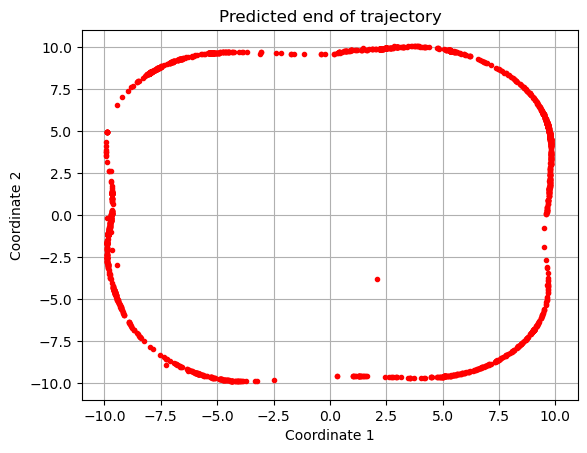

In [332]:
for k in range(len(trajectories_2)) :
    trajectory_k = np.array(trajectories_2[k])
    plt.plot(trajectory_k[len(t_eval_2)-1,0],trajectory_k[len(t_eval_2)-1,1], color= 'r', marker='.')
        #print(trajectory_k[99,0])
        #print(trajectory_k[99,1])
        #plt.plot(-0.74680196,  1.98292044, 'o', color = 'r')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-11,11)
plt.ylim(-11,11)
#plt.quiver(x0[:,0], x0[:,1], approx_field[:,0], approx_field[:,1], color= 'r')
#plt.scatter(x0[:,0],x0[:,1], label = 'X0', alpha= 0.5, marker= '.')
plt.grid()
plt.title("Predicted end of trajectory")